# Test de permutación para contraste de hipótesis
(resampling)

* Grupo A - nA - XA
* Grupo B - nB - XB

Ho = Ambas muestras pertenecen a la misma distribución *y* las diferencias observadas son causadas por las variaciones en el reparto de grupos aleatorios


1) Calcular la diferencia observada entre las medias de los dos grupos  (difobservada). (|XA-XB|)

2) Todas las observaciones se unen sin tener en cuenta el grupo al que pertenecen.

3) Generar todas las posibles combinaciones* en las que las observaciones pueden ser distribuidas en dos grupos de tamaño  nA  y  nB.

4) Para cada combinación, calcular la diferencia entre medias  (difcalculada). El conjunto de valores obtenidos forman la distribución exacta de las posibles diferencias siendo cierta la hipótesis nula de que los dos grupos proceden de la misma población. A esta distribución, se le conoce como permutation distribution of the mean difference.

5) Calcular el p-value de dos colas como la proporción de combinaciones en las que, el valor absoluto de la diferencia calculada, es mayor o igual al valor absoluto de la diferencia observada.

##EJERCICIO 1
Supóngase un estudio en el que se pretende determinar si la participación en actividades extraescolares aumenta la capacidad empática de los estudiantes. Para ello, el colegio ofrece un programa voluntario en el que, cada participante, se asigna de forma aleatoria a un grupo "control" que no recibe clases extraescolares o a un grupo "tratamiento" que sí las recibe. A final del año, todos los sujetos del estudio realizan un examen que cuantifica su capacidad empática. En vista de los resultados ¿Se puede considerar que las clases extraescolares tienen un impacto en cómo se relacionan socialmente (en promedio) los estudiantes?

El diseño experimental del estudio emplea una asignación aleatoria de los sujetos a dos grupos (tratamiento y control). Esta aleatoriedad en la asignación implica que, en promedio, los dos grupos son iguales para todas las características, por lo que la única diferencia entre ellos es si reciben o no el tratamiento. Para determinar si la diferencia observada es significativa, se puede estudiar cómo de probable es obtener una diferencia igual o mayor si el tratamiento no tiene efecto, o lo que es lo mismo, determinar si la diferencia observada es mayor de lo que cabría esperar debido únicamente a la variabilidad producida por la formación aleatoria de los grupos.

Ho: Xc = Xt   

Xc-Xt=0

Ha: Xc=/= Xt

Xc-Xt =/= 0


In [ ]:
# Librerias
#Datos
import pandas as pd
import numpy as np
#Gráficos
import matplotlib.pyplot as plt
#from matplotlib import style
import seaborn as sns

#Configurar matplot
#style.use('ggplot')
plt.style.use('ggplot')

#warnings
import warnings
warnings.filterwarnings('ignore')

#progreso de procesos
from tqdm import tqdm

In [ ]:
#Datos
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/AfterSchool.csv'
datos =  pd.read_csv(url)
datos = datos[['Treatment','Delinq']]
datos = datos.rename(columns={'Treatment':'grupo', 'Delinq':'valor'})
datos['grupo'] = np.where(datos['grupo'] == 0, 'control','tratamiento')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   grupo   356 non-null    object 
 1   valor   356 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


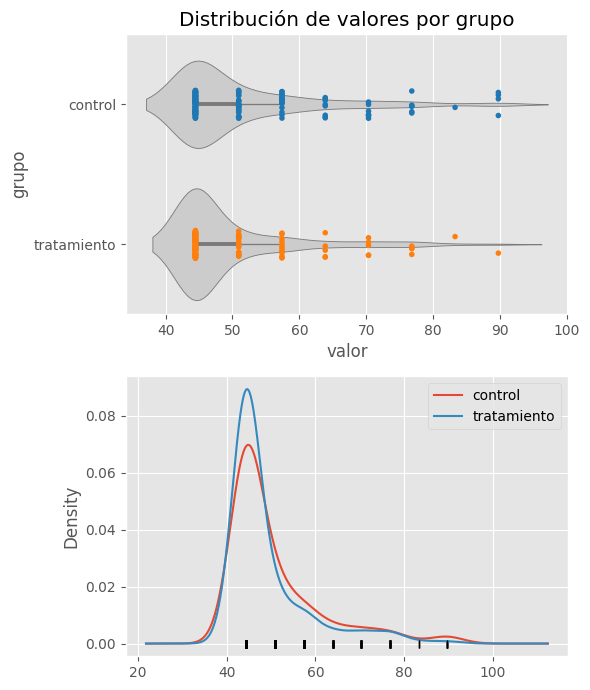

In [ ]:
#graficos de distribución
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6,7))
sns.violinplot(
    x = datos.valor,
    y = datos.grupo,
    color = '.8',
    ax= axs[0]
)

sns.stripplot(
    x = datos.valor,
    y = datos.grupo,
    data = datos,
    size = 4,
    jitter = 0.1,
    palette = 'tab10',
    ax = axs[0]
)
axs[0].set_title('Distribución de valores por grupo')
axs[0].set_ylabel('grupo')
axs[0].set_xlabel('valor')

for grupo in datos.grupo.unique():
  datos_temp = datos[datos.grupo == grupo]['valor']
  datos_temp.plot.kde(ax=axs[1], label=grupo)
  axs[1].plot(datos_temp, np.full_like(datos_temp,0),'|k', markeredgewidth=1)

axs[0].set_title('Distribución de valores por grupo')
axs[0].set_xlabel('valor')
axs[1].legend()

fig.tight_layout()

In [ ]:
#estadistica descriptiva por grupo
datos.groupby(by='grupo').describe()

valor                                                        \
             count       mean       std        min        25%        50%   
grupo                                                                      
control      187.0  50.725591  10.52089  44.463082  44.463082  44.463082   
tratamiento  169.0  49.018956   8.97423  44.463082  44.463082  44.463082   

                                   
                   75%        max  
grupo                              
control      50.933188  89.753823  
tratamiento  50.933188  89.753823

In [ ]:
#Test de permutaciones

def dif_mean(x1,x2):
  #x1 = media de muestra 1
  #x2 = media de grupo 2
  estadistico = np.mean(x1)-np.mean(x2)
  return estadistico

In [ ]:
dif_observada = dif_mean(
    x1 = datos[datos.grupo == 'control']['valor'],
    x2 = datos[datos.grupo == 'tratamiento']['valor']
)
print(dif_observada)

1.706635519197242


In [ ]:
#simulación de Monte Carlo
def permutaciones(x1, x2, fun_estadistico, n_iteraciones = 9999):
  n_x1 = len(x1)
  n_x2 = len(x2)
  pool_datos = np.hstack((x1,x2))

  resultados_perm = np.full(shape=n_iteraciones,fill_value=np.nan)

  for i in tqdm(range(n_iteraciones)):
    np.random.shuffle(pool_datos)
    estadistico = fun_estadistico(pool_datos[:n_x1],pool_datos[n_x1:])
    resultados_perm[i] = estadistico

  return resultados_perm

In [ ]:
dist_perm = permutaciones(
    x1 = datos[datos.grupo == 'control']['valor'],
    x2 = datos[datos.grupo == 'tratamiento']['valor'],
    fun_estadistico= dif_mean,
    n_iteraciones=9999
    )

100%|██████████| 9999/9999 [00:01<00:00, 8644.17it/s]


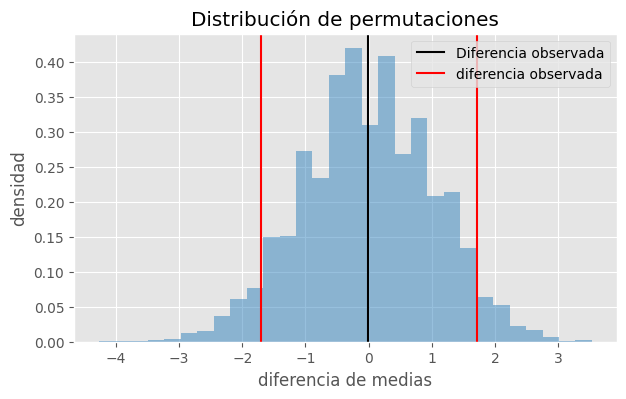

In [ ]:
#distribcuión de permutaciones
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(7,4))
ax.hist(dist_perm, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dist_perm.mean(), color='black', label='Diferencia observada')
ax.axvline(x=dif_observada, color='red', label='diferencia observada')
ax.axvline(x=-dif_observada, color='red')

ax.set_title('Distribución de permutaciones')
ax.set_xlabel('diferencia de medias')
ax.set_ylabel('densidad')
ax.legend()

In [ ]:
pd.Series(dist_perm).describe()

count    9999.000000
mean       -0.013231
std         1.065324
min        -3.978328
25%        -0.698541
50%        -0.042584
75%         0.686257
max         4.111812
dtype: float64